### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this

In [3]:
date = "24-12-10"
pathfile = f"Pulling data/{date}/single/"

### From here; automatic run

In [4]:
root = f"/Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/{pathfile}"

MODE = "single"
dev = False

In [5]:
if not root.endswith("/"):
    root += "/"

In [6]:
sep_category = "$" # separates categories like date, experiments, etc
sep_count = "%" # separated the number of hairs by experiment

In [7]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241210$IHNY$25%phosctrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$single.txt
20241210$IHNY$25%AActrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$single.txt
20241210$IHNY$25%AAsctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$single.txt
20241210$IHNY$25%phosctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$single.txt


In [8]:
savepath = f"{root}plots/"
if dev: 
    savepath = f"{root}plots/dev/"
    import plotting_dev as plotting
os.makedirs(savepath, exist_ok=True)

In [9]:
all_dfs = []
# we add a prefix to name, so if two experiments have the same name in two files
# that are plotted together, they don't get merge because of the same name
prefix = "A"
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = plotting.get_df_from_file(root + file,
                                       skip=10)
        # clean the df
        if MODE in file:
            df = plotting.clean_single(df)
            assert "single" in file
        else:
            raise ValueError(f"Not a {MODE} experiment")

        splitted_name = file.split(sep_category)
        # get the experiments; i.e. not the date
        # not the single or triple etc
        splitted_name = splitted_name[2:-1]
        print("splitted_name: ", splitted_name)
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split(sep_count)
            _times = int(times_name[0])
            _name = times_name[1]
            _name = prefix + "_" + _name
            all_names += [_name] * _times
        print(f"len df: {len(df)}, len names: {len(all_names)}")
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)

        # update prefix
        prefix = chr(ord(prefix) + 1)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241210$IHNY$25%phosctrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$single.txt
splitted_name:  ['25%phosctrl', '25% kp 0.01', '25%kp 0.03', '25% kp 0.05']
len df: 100, len names: 100
20241210$IHNY$25%AActrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$single.txt
splitted_name:  ['25%AActrl', '25% kp 0.01', '25%kp 0.03', '25% kp 0.05']
len df: 100, len names: 100
20241210$IHNY$25%AAsctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$single.txt
splitted_name:  ['25%AAsctrl', '25% pk30 0.01', '25%pk30 0.03', '25%pk30 0.05']
len df: 100, len names: 100
20241210$IHNY$25%phosctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$single.txt
splitted_name:  ['25%phosctrl', '25% pk30 0.01', '25%pk30 0.03', '25%pk30 0.05']
len df: 100, len names: 100


,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
1,2.0,4485.8,30.2,0.868,5.84,0.000000e+00,0.01070,0.232,22.5,0.861,59.7,0.000035,46.788,1.030,230.0,A_phosctrl
2,3.0,2338.4,30.2,0.404,5.23,0.000000e+00,0.00578,0.232,23.1,0.827,54.1,0.000016,52.050,0.501,214.0,A_phosctrl
3,4.0,4630.4,30.2,0.748,4.88,0.000000e+00,0.01160,0.265,18.1,0.828,45.3,0.000025,54.588,0.929,201.0,A_phosctrl
4,5.0,4774.1,30.1,0.922,5.81,5.050000e-07,0.00789,0.233,14.8,0.865,51.1,0.000030,36.748,0.931,195.0,A_phosctrl
5,6.0,2425.2,30.5,0.434,5.47,-1.470000e-08,0.00448,0.262,23.3,0.819,53.6,0.000016,44.364,0.411,170.0,A_phosctrl


Statistical significance between A_phosctrl and B_kp 0.03: p = 0.0203
Statistical significance between A_phosctrl and B_ kp 0.05: p = 0.0417
Statistical significance between A_phosctrl and C_ pk30 0.01: p = 0.0231
Statistical significance between A_phosctrl and C_pk30 0.03: p = 0.0301
Statistical significance between A_phosctrl and C_pk30 0.05: p = 0.0096
Statistical significance between A_phosctrl and D_pk30 0.05: p = 0.0235
Statistical significance between A_kp 0.03 and B_kp 0.03: p = 0.0490
Statistical significance between A_kp 0.03 and C_pk30 0.05: p = 0.0170
2 removed data points for TENSILE_STRENGTH


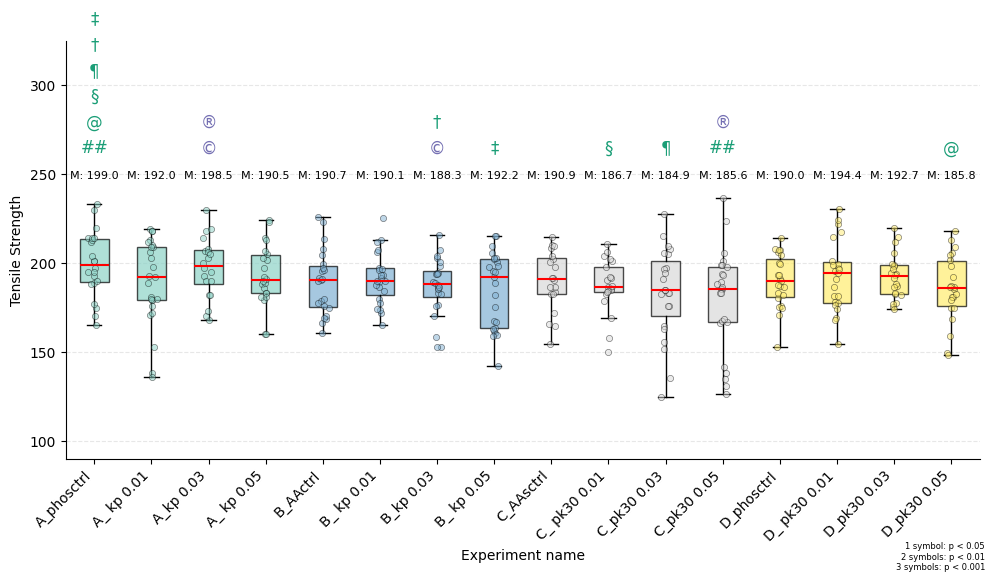

In [10]:
header = 'TENSILE_STRENGTH'
ymin = 90
ymax = 325
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Control check

In [11]:
unique_names = df_merged['Name'].unique()
for name in unique_names:
    median_tensile_strength = df_merged[df_merged['Name'] == name]['TENSILE_STRENGTH'].median()
    print(f"Median TENSILE_STRENGTH for {name}: {median_tensile_strength}")

Median TENSILE_STRENGTH for A_phosctrl: 199.0
Median TENSILE_STRENGTH for A_ kp 0.01: 192.0
Median TENSILE_STRENGTH for A_kp 0.03: 196.0
Median TENSILE_STRENGTH for A_ kp 0.05: 190.5
Median TENSILE_STRENGTH for B_AActrl: 190.1
Median TENSILE_STRENGTH for B_ kp 0.01: 189.7
Median TENSILE_STRENGTH for B_kp 0.03: 187.6
Median TENSILE_STRENGTH for B_ kp 0.05: 192.2
Median TENSILE_STRENGTH for C_AAsctrl: 188.65
Median TENSILE_STRENGTH for C_ pk30 0.01: 185.75
Median TENSILE_STRENGTH for C_pk30 0.03: 184.0
Median TENSILE_STRENGTH for C_pk30 0.05: 185.6
Median TENSILE_STRENGTH for D_phosctrl: 190.0
Median TENSILE_STRENGTH for D_ pk30 0.01: 192.65
Median TENSILE_STRENGTH for D_pk30 0.03: 193.5
Median TENSILE_STRENGTH for D_pk30 0.05: 184.05


In [12]:
len(df_merged)

382

Statistical significance between A_phosctrl and C_pk30 0.05: p = 0.0151
Statistical significance between A_ kp 0.01 and B_ kp 0.01: p = 0.0292
Statistical significance between A_ kp 0.01 and B_kp 0.03: p = 0.0443
Statistical significance between A_ kp 0.01 and C_pk30 0.05: p = 0.0095
Statistical significance between A_kp 0.03 and C_pk30 0.05: p = 0.0140
Statistical significance between B_ kp 0.01 and C_ pk30 0.01: p = 0.0242
Statistical significance between B_kp 0.03 and C_ pk30 0.01: p = 0.0398
Statistical significance between C_ pk30 0.01 and C_pk30 0.05: p = 0.0068
Statistical significance between C_pk30 0.03 and C_pk30 0.05: p = 0.0210
Statistical significance between C_pk30 0.05 and D_pk30 0.03: p = 0.0188
3 removed data points for BREAK_STRAIN(*)(#)


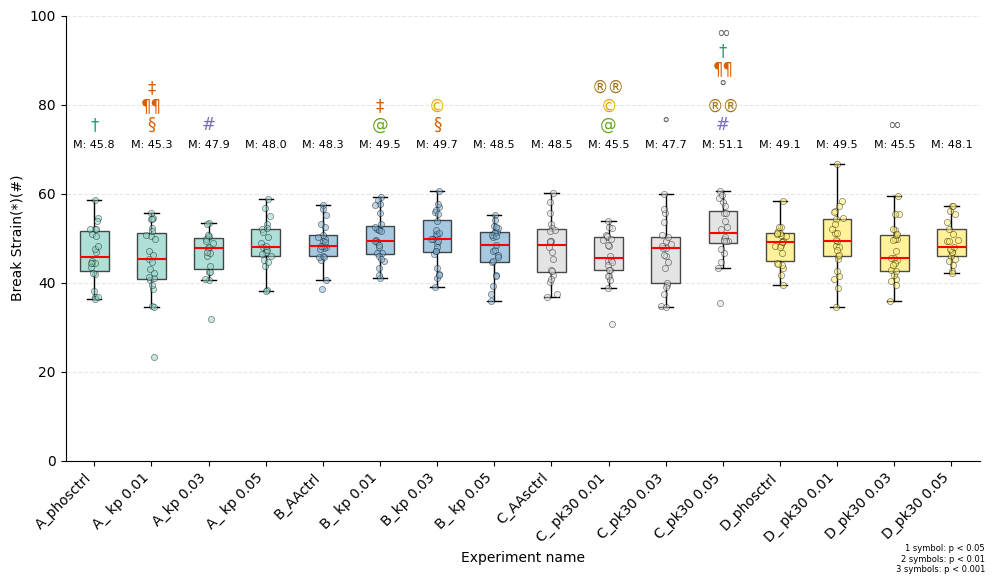

In [13]:
header = 'BREAK_STRAIN(*)(#)'
ymin = 0
ymax = 100
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_phosctrl and A_ kp 0.05: p = 0.0338
Statistical significance between A_phosctrl and C_AAsctrl: p = 0.0423
Statistical significance between A_ kp 0.05 and D_phosctrl: p = 0.0421
0 removed data points for BREAK_LOAD


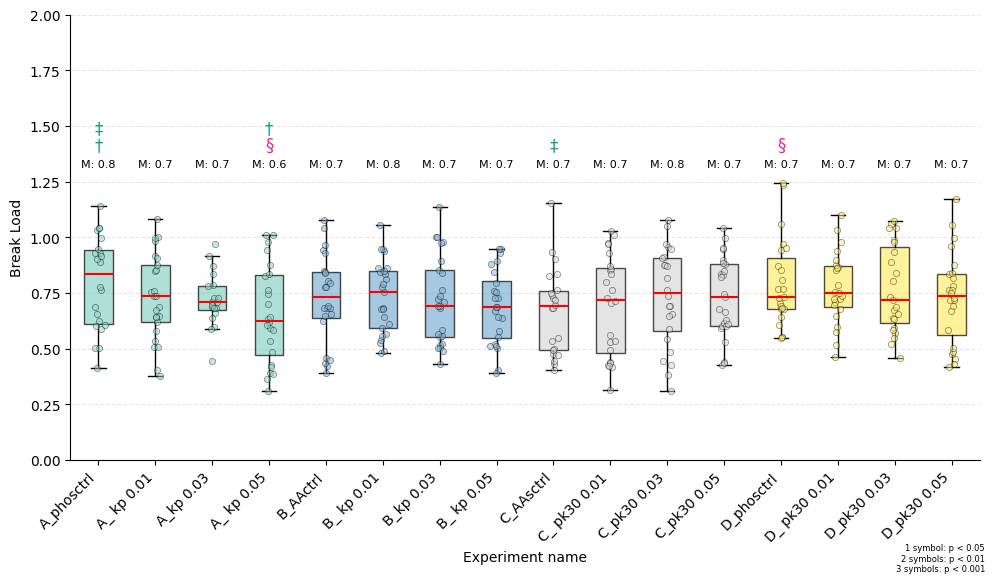

In [14]:
header = 'BREAK_LOAD'
ymin = 0
ymax = 2.0
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_phosctrl and B_ kp 0.01: p = 0.0463
Statistical significance between A_phosctrl and C_pk30 0.05: p = 0.0458
Statistical significance between A_phosctrl and D_phosctrl: p = 0.0090
Statistical significance between A_phosctrl and D_ pk30 0.01: p = 0.0226
Statistical significance between A_ kp 0.01 and B_ kp 0.01: p = 0.0044
Statistical significance between A_ kp 0.01 and B_kp 0.03: p = 0.0352
Statistical significance between A_ kp 0.01 and B_ kp 0.05: p = 0.0078
Statistical significance between A_ kp 0.01 and C_pk30 0.05: p = 0.0015
Statistical significance between A_ kp 0.01 and D_phosctrl: p = 0.0001
Statistical significance between A_ kp 0.01 and D_ pk30 0.01: p = 0.0017
Statistical significance between A_ kp 0.01 and D_pk30 0.03: p = 0.0327
Statistical significance between A_ kp 0.01 and D_pk30 0.05: p = 0.0076
Statistical significance between A_kp 0.03 and B_ kp 0.01: p = 0.0162
Statistical significance between A_kp 0.03 and B_ kp 0.05: p = 0.0275
S

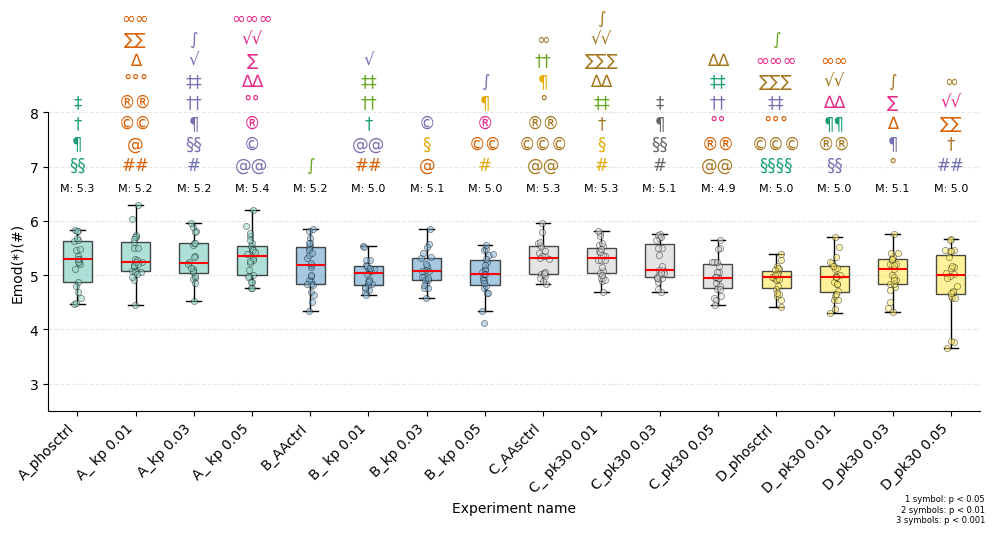

In [15]:
header = 'EMOD(*)(#)'
ymin = 2.5
ymax = 8.0
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

### Scatter plots with correlation

In [16]:
df_merged.columns

Index(['RECORD', 'MEAN AREA', 'ESTIMATED_LENGTH(*)', 'GRADIENT(*)',
       'EMOD(*)(#)', 'DECRIMPING_WORK', 'EXTENSION_WORK', 'START_X(*)',
       'START_Y', 'END_X(*)', 'END_Y', 'ANALYSIS_WORK', 'BREAK_STRAIN(*)(#)',
       'BREAK_LOAD', 'TENSILE_STRENGTH', 'Name'],
      dtype='object', name=0)

NameError: name 'os' is not defined

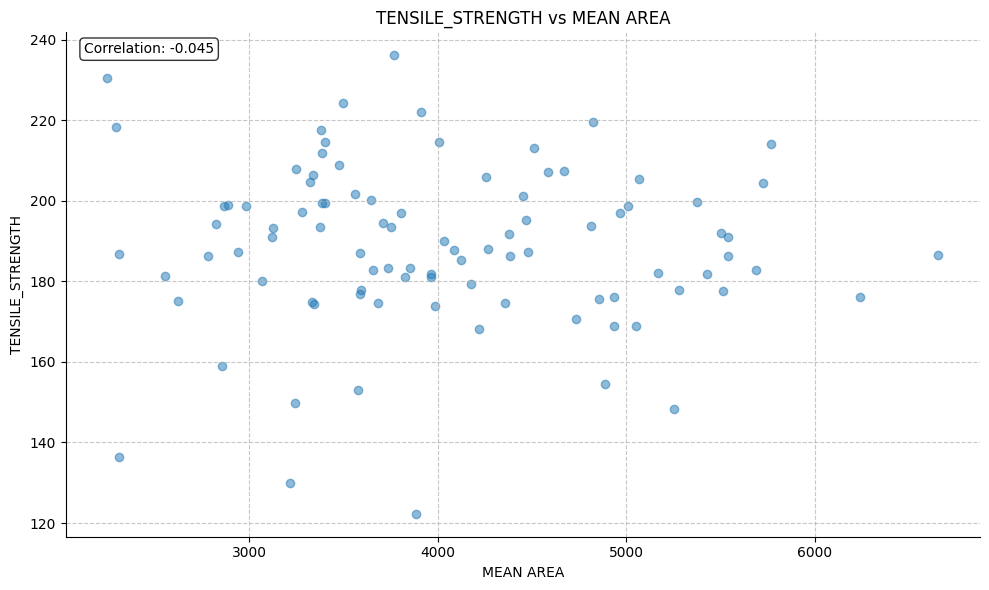

In [17]:
y_col = 'TENSILE_STRENGTH'
x_col = 'MEAN AREA'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

In [ ]:
y_col = 'EMOD(*)(#)'
x_col = 'MEAN AREA'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

In [ ]:
y_col = 'BREAK_LOAD'
x_col = 'MEAN AREA'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)